<a href="https://colab.research.google.com/github/PseudoPythonista/opencv/blob/master/doritos_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [80]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

In [81]:
doritos = cv2.imread("/content/doritos.jpg",0)
shelf = cv2.imread("/content/shop_shelf.jpg",0)

In [82]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(22,20))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap="gray")

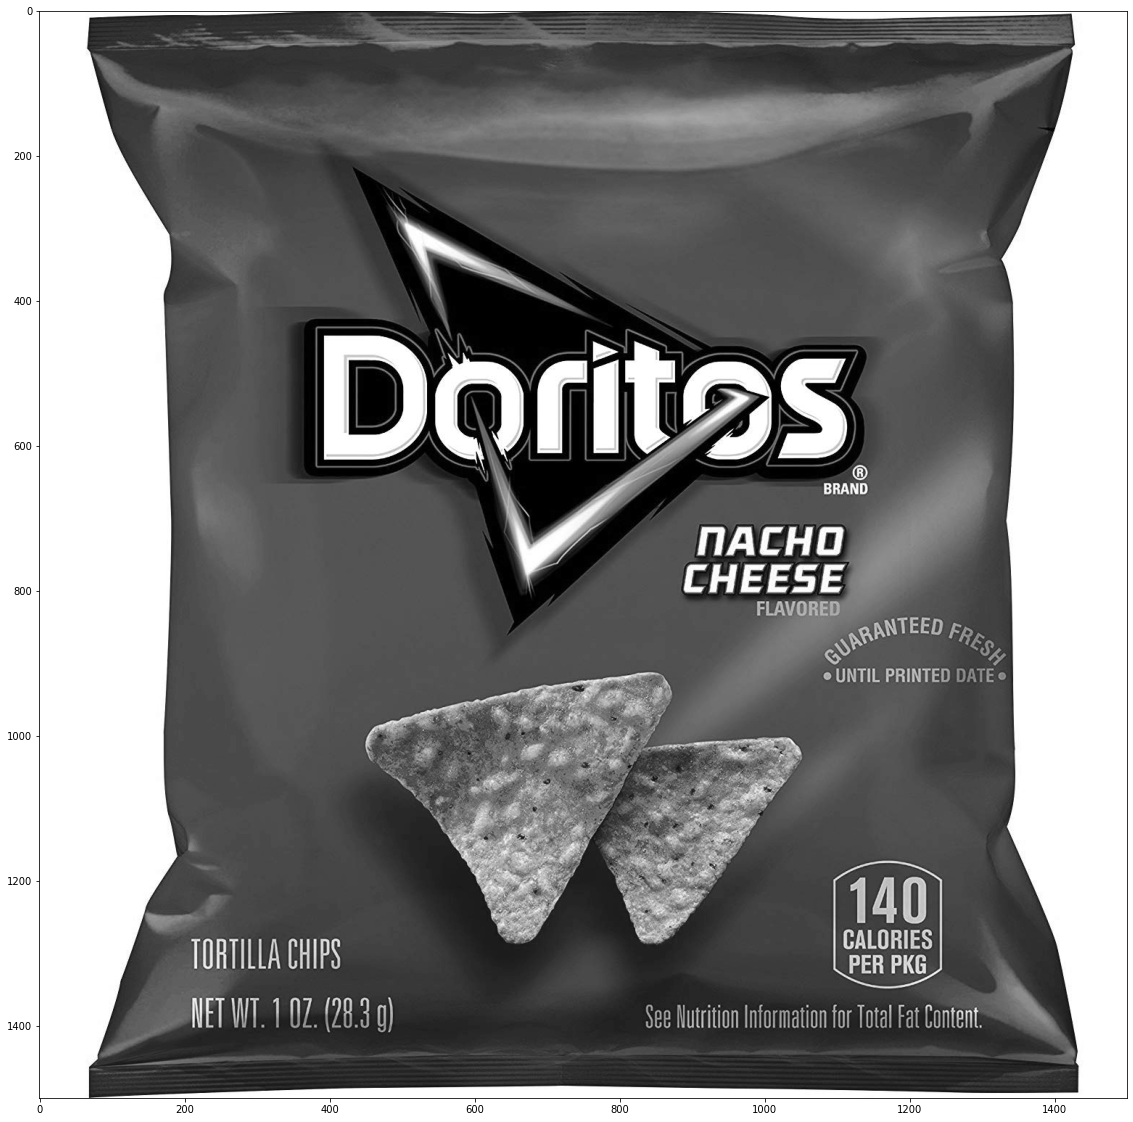

In [83]:
display(doritos)

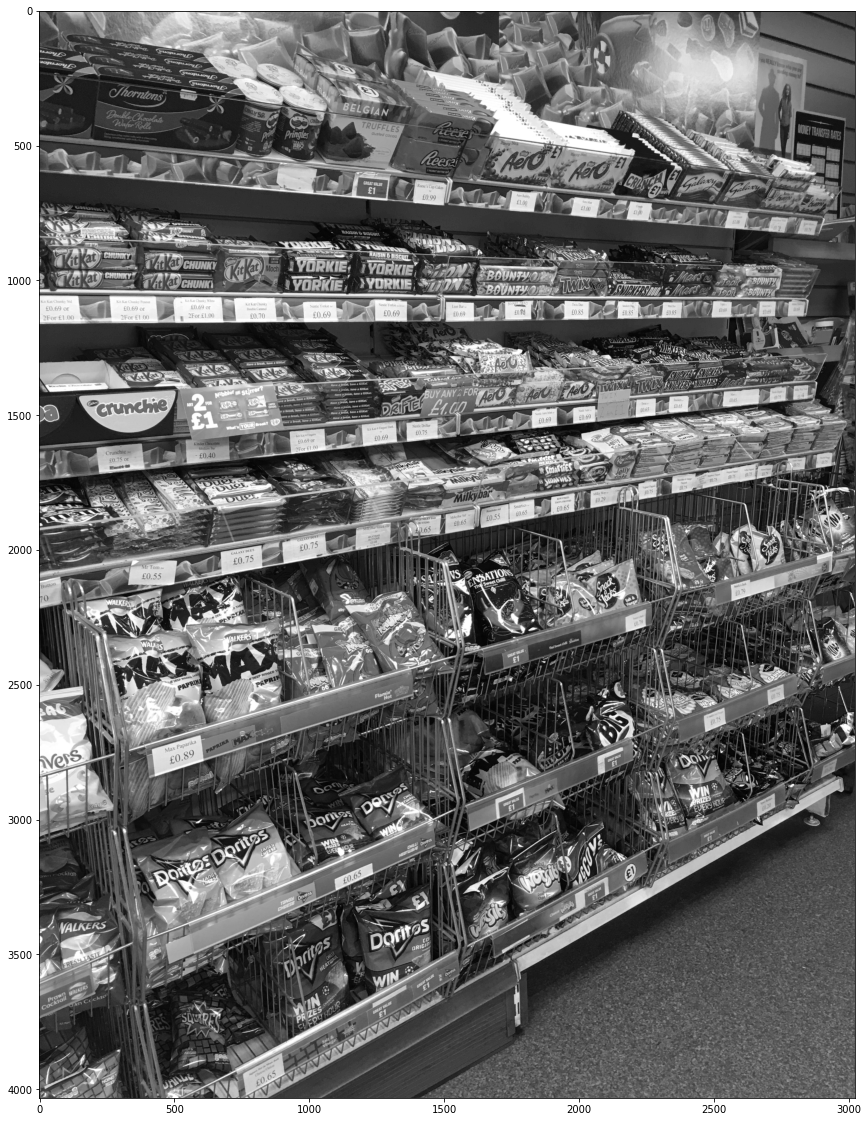

In [84]:
display(shelf)

In [85]:
#FLANN
sift = cv2.xfeatures2d.SIFT_create()

In [86]:
#key points and descriptors
kp1,des1 = sift.detectAndCompute(doritos,None)
kp2,des2 = sift.detectAndCompute(shelf,None)

In [87]:

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [88]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [89]:
matches = flann.knnMatch(des1,des2,k=2)

In [90]:
matchesMask = [[0,0] for i in range(len(matches))]

In [91]:
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]

In [92]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

In [94]:
flann_matches = cv2.drawMatchesKnn(doritos,kp1,shelf,kp2,matches,None,**draw_params)

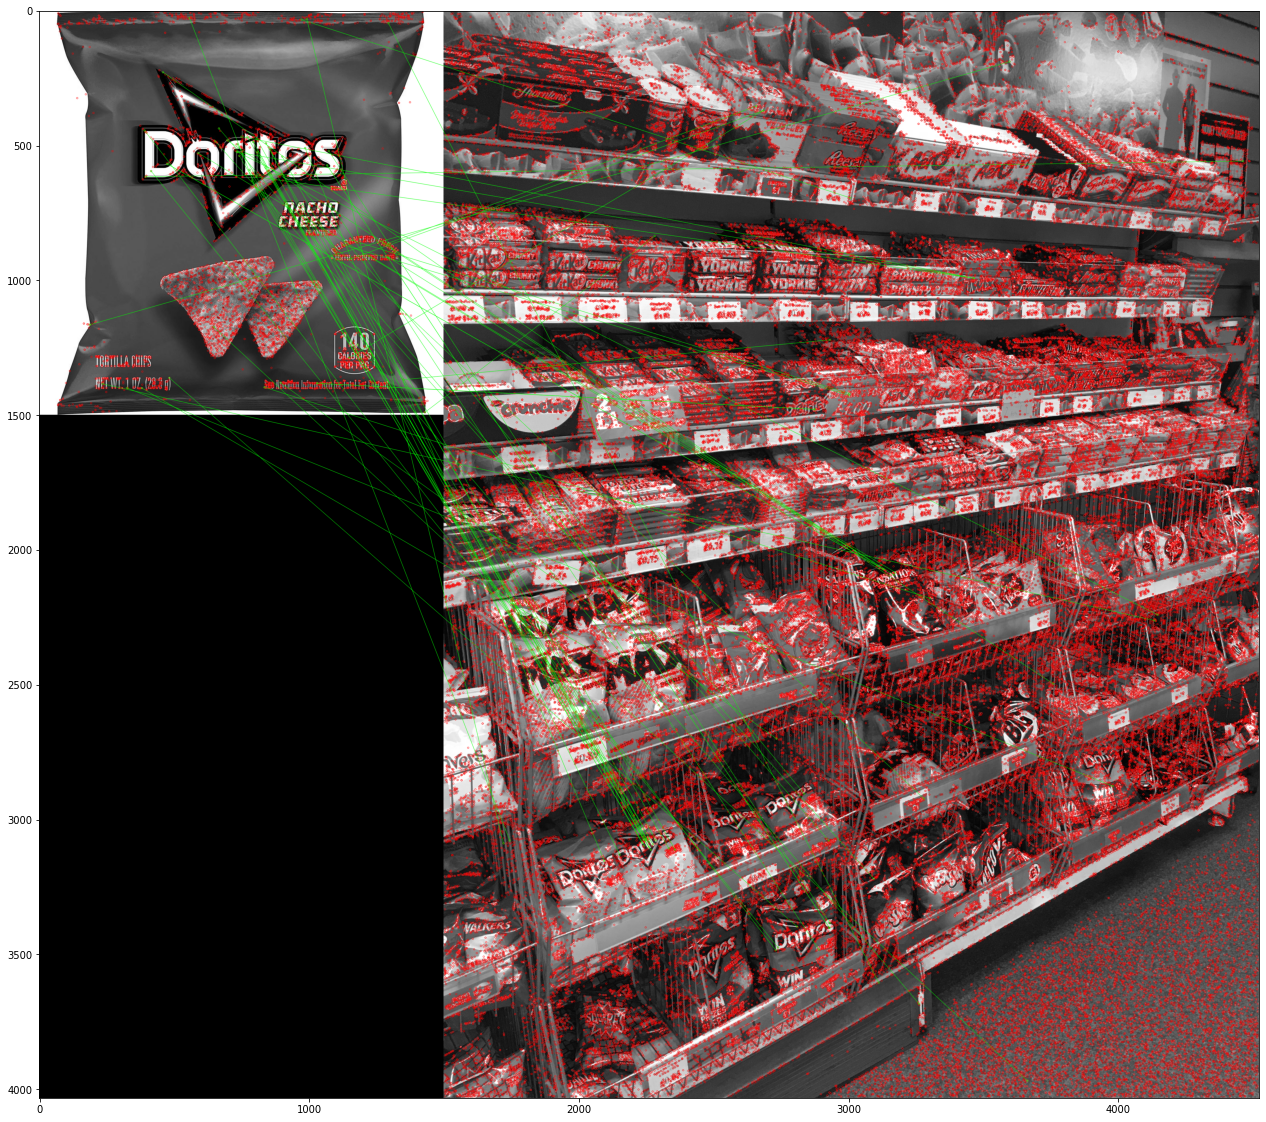

In [95]:
display(flann_matches)